In [3]:
from ler.rates import LeR

yr = 31536000
ler=LeR(
    npool=6,
    verbose=False,
    ifos=['CE', 'ET'],
    pdet_kwargs=dict(
        snr_th=10.0,
        snr_th_net=10.0,
        pdet_type="boolean",
        distribution_type="noncentral_chi2",
        include_optimal_snr=True,
        include_observed_snr=False,
    ),
    spin_zero = False,
    waveform_approximant = "IMRPhenomD",
    minimum_frequency = 10.0,)


Initializing LeR class...



In [4]:
lensed_param = ler.lensed_cbc_statistics(size=10, batch_size=10, resume=False)
rate_lensed, lensed_param_detectable = ler.lensed_rate()

print(f"\n=== Lensed Detection Rate Summary ===")
print(f"Detectable event rate: {rate_lensed:.2e} events per year")

lensed params will be stored in ./ler_data/lensed_param.json
removing ./ler_data/lensed_param.json if it exists
Batch no. 1
sampling lensed params...
sampling lens parameters with sample_all_routine_epl_shear_sl...
solving lens equations...


100%|███████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 62.68it/s]


calculating pdet...
lensed parameters already sampled.
saving all lensed parameters in ./ler_data/lensed_param.json 
Getting lensed_param from json file ./ler_data/lensed_param.json...
total lensed rate (yr^-1): 45.313257963398215
number of simulated lensed detectable events: 4
number of simulated all lensed events: 10
storing detectable params in ./ler_data/lensed_param_detectable.json

=== Lensed Detection Rate Summary ===
Detectable event rate: 4.53e+01 events per year


In [5]:
lensed_param.keys()

dict_keys(['zl', 'zs', 'sigma', 'theta_E', 'q', 'phi', 'gamma', 'gamma1', 'gamma2', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'x_source', 'y_source', 'effective_luminosity_distance', 'effective_geocent_time', 'effective_phase', 'pdet_CE', 'optimal_snr_CE', 'pdet_ET1', 'optimal_snr_ET1', 'pdet_ET2', 'optimal_snr_ET2', 'pdet_ET3', 'optimal_snr_ET3', 'pdet_net', 'optimal_snr_net'])

In [6]:
lensed_param['optimal_snr_net'], lensed_param['pdet_net']

(array([[ 31.92697799,   7.5966101 ,          nan,          nan],
        [ 17.4828612 ,   6.97010281,          nan,          nan],
        [ 35.5359774 ,   6.99842613,          nan,          nan],
        [ 40.86771215,   6.00471977,          nan,          nan],
        [ 78.1891495 ,  26.16969145,          nan,          nan],
        [104.13069082,  17.29169089,          nan,          nan],
        [ 58.13344802,  26.89342332,          nan,          nan],
        [ 46.04286483,  13.15459005,          nan,          nan],
        [ 39.01432513,   8.86109735,          nan,          nan],
        [ 35.23033154,   4.81008003,          nan,          nan]]),
 array([[ 1.,  0., nan, nan],
        [ 1.,  0., nan, nan],
        [ 1.,  0., nan, nan],
        [ 1.,  0., nan, nan],
        [ 1.,  1., nan, nan],
        [ 1.,  1., nan, nan],
        [ 1.,  1., nan, nan],
        [ 1.,  1., nan, nan],
        [ 1.,  0., nan, nan],
        [ 1.,  0., nan, nan]]))

In [2]:
unlensed_param = ler.unlensed_cbc_statistics(size=100000, resume=False)
rate_unlensed, unlensed_param_detectable = ler.unlensed_rate()

unlensed params will be stored in ./ler_data/unlensed_param.json
removing ./ler_data/unlensed_param.json if it exists
Batch no. 1
sampling gw source params...
calculating pdet...
Batch no. 2
sampling gw source params...
calculating pdet...
saving all unlensed parameters in ./ler_data/unlensed_param.json 
Getting unlensed_param from json file ./ler_data/unlensed_param.json...
total unlensed rate (yr^-1): 88681.51317616575
number of simulated unlensed detectable events: 96831
number of simulated all unlensed events: 100000
storing detectable params in ./ler_data/unlensed_param_detectable.json


In [3]:
unlensed_param_detectable.keys()

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'pdet_CE', 'optimal_snr_CE', 'pdet_ET1', 'optimal_snr_ET1', 'pdet_ET2', 'optimal_snr_ET2', 'pdet_ET3', 'optimal_snr_ET3', 'pdet_net', 'optimal_snr_net'])

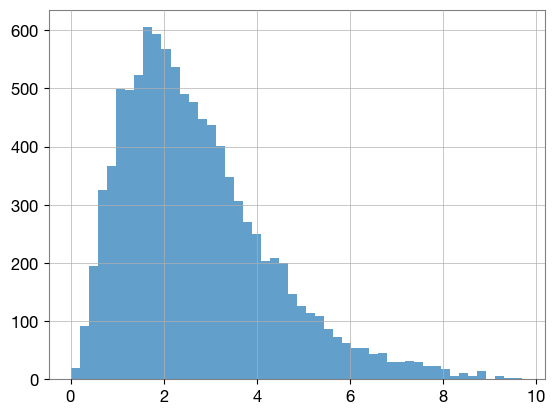

In [2]:
import numpy as np
import matplotlib.pyplot as plt

lensed_param = ler.sample_all_routine_epl_shear_intrinsic(10000)

plt.hist(lensed_param['zl'], bins=50, alpha=0.7, label='Effective Luminosity Distance')
plt.show()

In [4]:
rates = ler.rate_comparison_with_rate_calculation()

Getting unlensed_param from json file ./ler_data/unlensed_param.json...
total unlensed rate (yr^-1): 456.35886250930764
number of simulated unlensed detectable events: 555
number of simulated all unlensed events: 100000
storing detectable params in ./ler_data/unlensed_param_detectable.json
Getting lensed_param from json file ./ler_data/lensed_param.json...
total lensed rate (yr^-1): 0.2734961879316053
number of simulated lensed detectable events: 273
number of simulated all lensed events: 100000
storing detectable params in ./ler_data/lensed_param_detectable.json
unlensed_rate: 456.35886250930764
lensed_rate: 0.2734961879316053
ratio: 1668.6114200006027


In [8]:
rates[2]['magnifications']

array([[  3.30724761,  15.41881695, -12.947884  ,  -3.1641633 ],
       [  2.28195312,   3.47495727,  -2.24547299,  -0.86106485],
       [  3.49283514,  25.85140929, -24.98282226,  -1.66587485],
       ...,
       [  5.21645891,   7.65252608,  -8.86717209,  -0.90358742],
       [  4.03740455,  26.35473801, -14.28232827, -13.85953856],
       [  5.24709972,  -3.03618852,   0.        ,   0.        ]])

In [6]:
from gwsnr import GWSNR
gwsnr = GWSNR(
    npool=6,
    pdet_kwargs=dict(
        snr_th=10.0,
        snr_th_net=10.0,
        pdet_type="boolean",
        distribution_type="noncentral_chi2",
        include_optimal_snr=True,
        include_observed_snr=False,
    ),
)


Initializing GWSNR class...

psds not given. Choosing bilby's default psds
Interpolator will be loaded for L1 detector from ./interpolator_json/L1/partialSNR_dict_1.json
Interpolator will be loaded for H1 detector from ./interpolator_json/H1/partialSNR_dict_1.json
Interpolator will be loaded for V1 detector from ./interpolator_json/V1/partialSNR_dict_1.json

Chosen GWSNR initialization parameters:

npool:  6
snr type:  interpolation_aligned_spins
waveform approximant:  IMRPhenomD
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
reference frequency (f_ref):  20.0
mtot=mass1+mass2
min(mtot):  9.96
max(mtot) (with the given fmin=20.0): 235.0
detectors:  ['L1', 'H1', 'V1']
psds:  [[array([  10.21659,   10.23975,   10.26296, ..., 4972.81   ,
       4984.081  , 4995.378  ], shape=(2736,)), array([4.43925574e-41, 4.22777986e-41, 4.02102594e-41, ...,
       6.51153524e-46, 6.43165104e-46, 6.55252996e-46],
      shape=(2736,)), <scipy.interpolate._interpolate.interp1d object at 0x17

In [8]:
gwsnr.pdet()

{'pdet_L1': array([1]),
 'optimal_snr_L1': array([126.70322597]),
 'pdet_H1': array([1]),
 'optimal_snr_H1': array([80.58238087]),
 'pdet_V1': array([1]),
 'optimal_snr_V1': array([37.52248711]),
 'pdet_net': array([1]),
 'optimal_snr_net': array([154.77456062])}

In [7]:
from ler import LeR

ler = LeR(npool=6, verbose=False)


Initializing LeR class...



In [8]:
sfr_with_time_delay = ler.sfr_with_time_delay(zs=None, get_attribute=True)

Numerically solving the merger_rate_density with time delay
Computing merger rate density distribution (with time delay to SFR) using multiprocessing...


100%|█████████████████████████████████████████████████████████████| 500/500 [37:45<00:00,  4.53s/it]


sfr_with_time_delay interpolator will be generated at ./interpolator_json/merger_rate_density/sfr_with_time_delay_4.json


In [ ]:
madau_dickinson_sfr = ler.madau_dickinson_sfr(zs=None, get_attribute=True)

# BBH Merger Rate Density with Time-Delay Convolution

Following **Vitale et al. (2018/2021)** - "Measuring the star formation rate with gravitational waves from binary black holes"

The source-frame volumetric merger-rate density is:
$$R_{\rm m}(z_{\rm m}) = A \int_{z_{\rm m}}^{\infty} dz_{\rm f} \left|\frac{dt}{dz_{\rm f}}\right| \eta(z_{\rm f}) \psi(z_{\rm f}) \frac{1}{\tau} \exp\left[-\frac{t(z_{\rm m})-t(z_{\rm f})}{\tau}\right]$$

Where:
- $\psi(z)$ = Madau-Dickinson star formation rate
- $\eta(z)$ = Low-metallicity efficiency factor
- $\tau$ = Characteristic delay time
- $A$ = Normalization constant (fixed by GWTC-4 local rate)

In [13]:
"""
BBH merger-rate density Rm(z) from SFR(z) convolved with an exponential time-delay kernel.

Goal:
    Compute the SOURCE-FRAME volumetric BBH merger-rate density
        Rm(z) = dN_merge / (dVc dt_source)   [Gpc^-3 yr^-1]
    using:
        - Madau–Dickinson SFR
        - metallicity efficiency eta(z) = fraction of star formation below 0.1 Zsun
        - exponential delay-time distribution p(td|tau) = (1/tau) exp(-td/tau)
        - normalization to the GWTC-4 local BBH merger rate R0_BBH

This follows the structure in Vitale et al. (Sec. 2), with the exponential delay model.
"""

from __future__ import annotations

import numpy as np
from dataclasses import dataclass
from scipy.integrate import cumulative_trapezoid
from scipy.special import erf


# -------------------------
# 1) Cosmology helper class
# -------------------------

@dataclass(frozen=True)
class FlatLambdaCDM:
    """
    Flat LCDM cosmology, sufficient for time-redshift conversion.

    Parameters
    ----------
    H0_km_s_Mpc : float
        Hubble constant in km/s/Mpc
    Omega_m : float
        Matter density parameter
    Omega_L : float
        Dark-energy density parameter (flatness => Omega_L = 1 - Omega_m)
    """
    H0_km_s_Mpc: float = 67.7
    Omega_m: float = 0.31
    Omega_L: float = 0.69

    def E(self, z: np.ndarray) -> np.ndarray:
        """Dimensionless expansion rate: E(z) = H(z)/H0."""
        return np.sqrt(self.Omega_m * (1.0 + z) ** 3 + self.Omega_L)

    def H0_in_Gyr_inv(self) -> float:
        """
        Convert H0 from km/s/Mpc to 1/Gyr.

        1 Mpc = 3.085677581e19 km
        1 Gyr = 3.15576e16 s
        """
        Mpc_km = 3.085677581e19
        sec_per_Gyr = 3.15576e16
        H0_s_inv = self.H0_km_s_Mpc / Mpc_km
        return H0_s_inv * sec_per_Gyr

    def H_in_Gyr_inv(self, z: np.ndarray) -> np.ndarray:
        """H(z) in 1/Gyr."""
        return self.H0_in_Gyr_inv() * self.E(z)

    def dt_dz_Gyr(self, z: np.ndarray) -> np.ndarray:
        """
        dt/dz in Gyr per unit redshift (negative).
        We often use |dt/dz| = 1/((1+z)H(z)).
        """
        return -1.0 / ((1.0 + z) * self.H_in_Gyr_inv(z))

    def lookback_time_Gyr(self, z_grid: np.ndarray) -> np.ndarray:
        """
        Lookback time t_lb(z) = ∫_0^z dz' / ((1+z') H(z')) in Gyr.

        This function returns an array t_lb(z_grid[i]) on the provided grid.
        """
        z = np.asarray(z_grid)
        integrand = 1.0 / ((1.0 + z) * self.H_in_Gyr_inv(z))  # Gyr
        # cumulative_trapezoid gives integral from z[0] to z[i]
        t_lb = cumulative_trapezoid(integrand, z, initial=0.0)
        return t_lb

    def cosmic_time_Gyr(self, z_grid: np.ndarray) -> np.ndarray:
        """
        Cosmic time since Big Bang at redshift z:
            t(z) = t0 - t_lb(z)
        where t0 is the age of the Universe at z=0 computed consistently on the grid.
        """
        t_lb = self.lookback_time_Gyr(z_grid)
        t0 = t_lb[-1]  # only true if z_grid ends at very large z.
        # Better: compute t0 by integrating to a large zmax.
        # Here we assume z_grid[-1] is large enough that t_lb(zmax) ~ t0.
        return t0 - t_lb


# ---------------------------------
# 2) Madau–Dickinson star formation
# ---------------------------------

def sfr_madau_dickinson(z: np.ndarray,
                        psi0: float = 0.015,
                        alpha: float = 2.7,
                        beta: float = 5.6,
                        C: float = 2.9) -> np.ndarray:
    """
    Madau–Dickinson SFR density:
        psi(z) = psi0 (1+z)^alpha / [1 + ((1+z)/C)^beta]

    Units:
        psi0 is typically in Msun Mpc^-3 yr^-1.
    """
    z = np.asarray(z)
    return psi0 * (1.0 + z) ** alpha / (1.0 + ((1.0 + z) / C) ** beta)


# ---------------------------------------------------------
# 3) Metallicity efficiency eta(z): fraction below 0.1 Zsun
# ---------------------------------------------------------

def log10_Zmean_belczynski(z_grid: np.ndarray,
                           sfr_grid: np.ndarray,
                           cosmo: FlatLambdaCDM,
                           Omega_b: float = 0.045,
                           h0: float | None = None,
                           R: float = 0.27,
                           y: float = 0.019) -> np.ndarray:
    """
    Compute log10(Z_mean(z)) using a Belczynski-style prescription.

    In Vitale et al., eta(z) is defined via a metallicity distribution with mean Z_mean(z),
    following Belczynski et al. (2016). The paper writes an expression of the form:

        log Z_mean(z) = 0.5 + log[ (y(1-R)/rho_b) * ∫_{z}^{20} K * sfr(z') / (H0 E(z') (1+z')) dz' ]

    Here we implement a numerically stable GRID version of "integral from z to zmax"
    using cumulative trapezoids.

    Notes:
    - This is the most “paper-faithful” metallicity trend, but for many applications
      you can replace this entire function with a simpler fit for Z_mean(z).
    - The normalization constants mostly change the absolute scale of Z_mean, but eta(z)
      is not extremely sensitive provided Z_mean decreases with z.

    Parameters
    ----------
    z_grid : array
        Must be sorted increasing: z_grid[0]=0, ..., z_grid[-1]=zmax
    sfr_grid : array
        SFR evaluated on z_grid (Msun Mpc^-3 yr^-1)
    cosmo : FlatLambdaCDM
        Cosmology object
    Omega_b, R, y : floats
        Baryon density parameter, return fraction, yield. Values as used in the literature.
    h0 : float or None
        If None, inferred from H0_km_s_Mpc / 100

    Returns
    -------
    log10Zmean : array
        log10(Z_mean / Zsun) (dimensionless)
    """
    z = np.asarray(z_grid)
    sfr = np.asarray(sfr_grid)

    if h0 is None:
        h0 = cosmo.H0_km_s_Mpc / 100.0

    # rho_b in Msun / Mpc^3 (Belczynski-style)
    # rho_crit ~ 2.77e11 h^2 Msun/Mpc^3, so rho_b = rho_crit * Omega_b
    rho_b = 2.77e11 * Omega_b * h0**2  # Msun / Mpc^3

    # The integrand ~ sfr(z) / [E(z) (1+z)]
    integrand = sfr / (cosmo.E(z) * (1.0 + z))  # Msun Mpc^-3 yr^-1

    # integral_from_0_to_z using cumulative trapezoid
    I_0_to_z = cumulative_trapezoid(integrand, z, initial=0.0)

    # integral_from_z_to_zmax = I(0->zmax) - I(0->z)
    I_total = I_0_to_z[-1]
    I_z_to_zmax = I_total - I_0_to_z

    # The constant "K" and exact H0 placement differ by convention across papers.
    # We keep a simple, dimensionally consistent scaling that reproduces a decreasing Z_mean with z.
    # You may tune prefactors if you wish to match a specific figure.
    prefactor = y * (1.0 - R) / rho_b

    Zmean = prefactor * I_z_to_zmax
    # Avoid log of zero
    Zmean = np.clip(Zmean, 1e-30, None)

    # Vitale writes "+0.5 + log(...)" (log base 10 in astro usage).
    log10Zmean = 0.5 + np.log10(Zmean)
    return log10Zmean


def eta_lowZ_fraction(z_grid: np.ndarray,
                      log10Zmean_grid: np.ndarray,
                      sigma_dex: float = 0.5,
                      Zth_over_Zsun: float = 0.1) -> np.ndarray:
    """
    eta(z) = fraction of star formation below Zth (default 0.1 Zsun),
    assuming log10 Z is Normal(log10Zmean(z), sigma_dex^2).

        eta(z) = 0.5 [1 + erf( (log10(Zth) - log10Zmean) / (sqrt(2)*sigma) )]
    """
    z = np.asarray(z_grid)
    log10Zmean = np.asarray(log10Zmean_grid)
    log10Zth = np.log10(Zth_over_Zsun)
    arg = (log10Zth - log10Zmean) / (np.sqrt(2.0) * sigma_dex)
    return 0.5 * (1.0 + erf(arg))


# ---------------------------------------------
# 4) Exponential delay kernel and merger-rate Rm
# ---------------------------------------------

def merger_rate_density_bbh(z_grid: np.ndarray,
                            tau_Gyr: float,
                            R0_BBH_Gpc3_yr: float = 19.0,
                            cosmo: FlatLambdaCDM | None = None,
                            use_belczynski_Zmean: bool = True) -> tuple[np.ndarray, np.ndarray]:
    """
    Compute the source-frame BBH merger-rate density Rm(z) on a redshift grid.

    Model:
        Rf(z) = A * eta(z) * SFR(z)
        p(td|tau) = (1/tau) exp(-td/tau)
        Rm(zm) = ∫_{zf=zm}^{zmax} dzf |dt/dzf| Rf(zf) p(td(zm,zf)|tau)

    Normalization:
        Choose A such that Rm(0) = R0_BBH_Gpc3_yr.

    Parameters
    ----------
    z_grid : array
        Increasing redshift grid, starting at 0.
    tau_Gyr : float
        Exponential time-delay scale in Gyr.
    R0_BBH_Gpc3_yr : float
        Local BBH merger-rate density from GWTC-4 (representative median).
    cosmo : FlatLambdaCDM or None
        If None, use default Planck-like flat LCDM in this script.
    use_belczynski_Zmean : bool
        If True, compute Z_mean(z) using a Belczynski-style integral (more paper-faithful).
        If False, use a simple toy model for log10 Zmean(z) to keep the code minimal.

    Returns
    -------
    z_grid : array
        The input grid.
    Rm_Gpc3_yr : array
        Source-frame merger-rate density on z_grid in Gpc^-3 yr^-1.
    """
    if cosmo is None:
        cosmo = FlatLambdaCDM()

    z = np.asarray(z_grid)
    if not np.all(np.diff(z) > 0):
        raise ValueError("z_grid must be strictly increasing.")

    # --- SFR on the grid ---
    sfr = sfr_madau_dickinson(z)

    # --- Metallicity efficiency eta(z) ---
    if use_belczynski_Zmean:
        log10Zmean = log10_Zmean_belczynski(z, sfr, cosmo)
    else:
        # Simple fallback toy model (monotonic decline of mean metallicity with redshift):
        # log10(Zmean/Zsun) ~ 0 at z=0 and decreases with redshift.
        log10Zmean = 0.0 - 0.15 * z

    eta = eta_lowZ_fraction(z, log10Zmean, sigma_dex=0.5, Zth_over_Zsun=0.1)

    # --- Time quantities ---
    # |dt/dz| evaluated on grid (Gyr per redshift)
    abs_dt_dz = np.abs(cosmo.dt_dz_Gyr(z))

    # Cosmic time t(z) in Gyr (we compute via lookback time).
    # To compute t(z) robustly, we need the age t0. We approximate it by integrating to zmax.
    # With zmax ~ 20, this is a good approximation.
    t_lb = cosmo.lookback_time_Gyr(z)
    t0 = t_lb[-1]
    t = t0 - t_lb  # cosmic time at each z (Gyr)

    # --- Build the unnormalized shape Rm_tilde(z) with A=1 ---
    # The integral is over formation redshift zf >= zm.
    # For each zm, compute td = t(zm) - t(zf) >= 0.
    Rm_tilde = np.zeros_like(z, dtype=float)

    inv_tau = 1.0 / tau_Gyr

    for i, zm in enumerate(z):
        # formation grid is zf = z[i:]
        zf = z[i:]
        # time delay td(zm, zf) = t(zm) - t(zf)
        td = t[i] - t[i:]  # >= 0

        # Exponential delay kernel
        p_td = inv_tau * np.exp(-td * inv_tau)  # 1/Gyr

        # Integrand:
        # |dt/dzf| [Gyr] * eta(zf)*sfr(zf) * p_td [1/Gyr]
        integrand = abs_dt_dz[i:] * (eta[i:] * sfr[i:]) * p_td

        # Integrate over zf
        Rm_tilde[i] = np.trapz(integrand, zf)

    # --- Normalize to match local rate Rm(0)=R0_BBH ---
    if Rm_tilde[0] <= 0:
        raise RuntimeError("Computed unnormalized Rm_tilde[0] is non-positive; check inputs.")

    A = R0_BBH_Gpc3_yr / Rm_tilde[0]
    Rm = A * Rm_tilde

    return z, Rm


# -----------------------------
# 5) Example usage (quick test)
# -----------------------------

if __name__ == "__main__":
    # Redshift grid
    zmax = 20.0
    Nz = 500
    z_grid = np.linspace(0.0, zmax, Nz)

    # Choose a time-delay scale tau (Gyr)
    tau_Gyr = 1.0

    # Compute Rm(z) normalized to GWTC-4 local BBH rate
    z, Rm = merger_rate_density_bbh(
        z_grid=z_grid,
        tau_Gyr=tau_Gyr,
        R0_BBH_Gpc3_yr=19.0,          # GWTC-4 representative median
        cosmo=FlatLambdaCDM(),        # defaults OK
        use_belczynski_Zmean=True     # paper-faithful option
    )

    # Print a few values
    print("z    Rm(z) [Gpc^-3 yr^-1]")
    for zi in [0.0, 0.5, 1.0, 2.0, 5.0, 10.0]:
        j = np.argmin(np.abs(z - zi))
        print(f"{z[j]:4.1f}  {Rm[j]:.3e}")


z    Rm(z) [Gpc^-3 yr^-1]
 0.0  1.900e+01
 0.5  5.579e+01
 1.0  1.045e+02
 2.0  9.530e+01
 5.0  9.677e+00
10.0  7.709e-01


/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_60040/128837022.py:123: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Rm_tilde[i] = np.trapz(integrand, zf)
/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_60040/128837022.py:162: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_rate = np.trapz(dR_dz, z)  # total detections per year if detector is perfect (no selection)


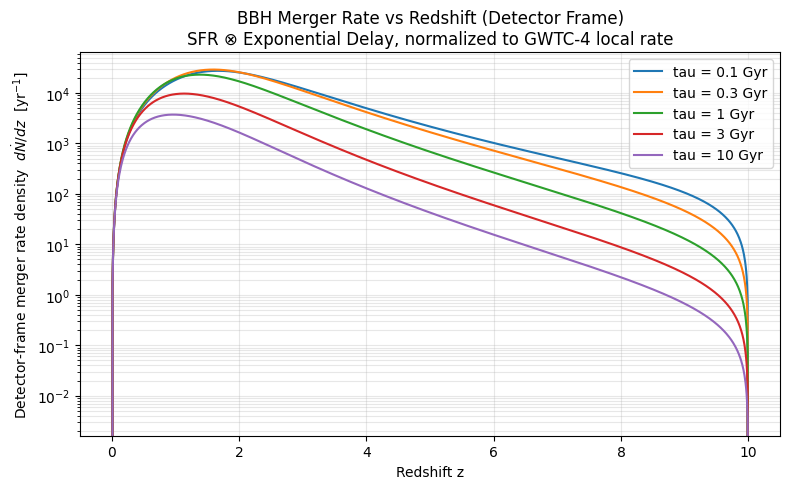

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_60040/128837022.py:182: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  y_norm = y / np.trapz(y, z)


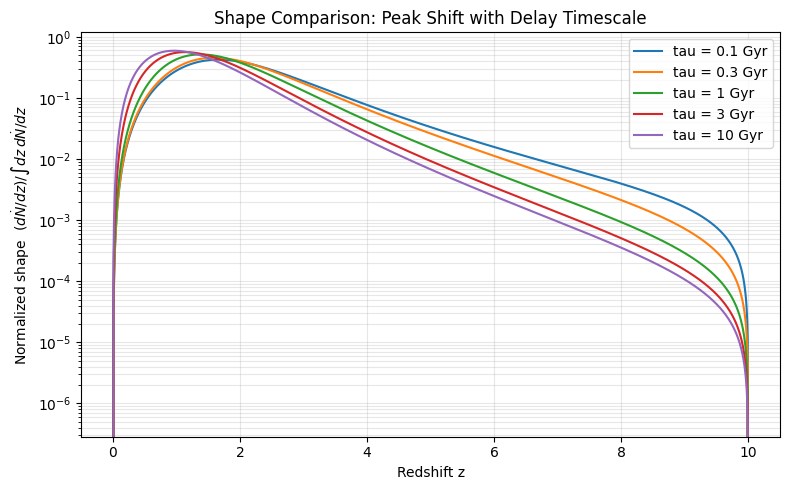

Total detector-frame merger rate (all-sky, ideal detection; no selection effects):
  tau =  0.1 Gyr :   6.462e+04  yr^-1
  tau =  0.3 Gyr :   6.366e+04  yr^-1
  tau =    1 Gyr :   4.457e+04  yr^-1
  tau =    3 Gyr :   1.721e+04  yr^-1
  tau =   10 Gyr :   6.256e+03  yr^-1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from scipy.integrate import cumulative_trapezoid
from scipy.special import erf

# -------------------------
# Cosmology (flat LCDM)
# -------------------------
@dataclass(frozen=True)
class FlatLambdaCDM:
    H0_km_s_Mpc: float = 67.7
    Omega_m: float = 0.31
    Omega_L: float = 0.69

    def E(self, z):
        return np.sqrt(self.Omega_m * (1 + z) ** 3 + self.Omega_L)

    def H(self, z):
        # km/s/Mpc
        return self.H0_km_s_Mpc * self.E(z)

    def dt_dz_Gyr(self, z):
        # dt/dz in Gyr (negative)
        # dt/dz = -1/((1+z)H(z)) with H in 1/Gyr
        Mpc_km = 3.085677581e19
        sec_per_Gyr = 3.15576e16
        H0_s_inv = self.H0_km_s_Mpc / Mpc_km
        H0_Gyr_inv = H0_s_inv * sec_per_Gyr
        H_Gyr_inv = H0_Gyr_inv * self.E(z)
        return -1.0 / ((1.0 + z) * H_Gyr_inv)

    def lookback_time_Gyr(self, z_grid):
        z = np.asarray(z_grid)
        integrand = np.abs(self.dt_dz_Gyr(z))  # Gyr per dz
        return cumulative_trapezoid(integrand, z, initial=0.0)

    def comoving_distance_Mpc(self, z_grid):
        # Dc(z) = (c/H0) * ∫0^z dz'/E(z')
        z = np.asarray(z_grid)
        c_km_s = 299792.458
        prefactor_Mpc = c_km_s / self.H0_km_s_Mpc
        integrand = 1.0 / self.E(z)
        integral = cumulative_trapezoid(integrand, z, initial=0.0)
        return prefactor_Mpc * integral

    def dVc_dz_Gpc3(self, z_grid):
        """
        dVc/dz = 4π * (c/H(z)) * Dc(z)^2
        Returns in Gpc^3 per redshift.
        """
        z = np.asarray(z_grid)
        c_km_s = 299792.458
        Dc_Mpc = self.comoving_distance_Mpc(z)
        dDc_dz_Mpc = (c_km_s / self.H0_km_s_Mpc) * (1.0 / self.E(z))
        # dVc/dz in Mpc^3
        dVc_dz_Mpc3 = 4.0 * np.pi * Dc_Mpc**2 * dDc_dz_Mpc
        return dVc_dz_Mpc3 / 1e9  # (1 Gpc)^3 = (1000 Mpc)^3 = 1e9 Mpc^3


# -------------------------
# Astrophysical ingredients
# -------------------------
def sfr_madau_dickinson(z, psi0=0.015, alpha=2.7, beta=5.6, C=2.9):
    z = np.asarray(z)
    return psi0 * (1.0 + z) ** alpha / (1.0 + ((1.0 + z) / C) ** beta)

def log10_Zmean_belczynski(z_grid, sfr_grid, cosmo, Omega_b=0.045, R=0.27, y=0.019):
    """
    Belczynski-style mean metallicity evolution.
    This provides a smooth decreasing Z_mean(z), used only to construct eta(z).
    """
    z = np.asarray(z_grid)
    sfr = np.asarray(sfr_grid)
    h0 = cosmo.H0_km_s_Mpc / 100.0
    rho_b = 2.77e11 * Omega_b * h0**2  # Msun/Mpc^3
    integrand = sfr / (cosmo.E(z) * (1.0 + z))
    I_0_to_z = cumulative_trapezoid(integrand, z, initial=0.0)
    I_total = I_0_to_z[-1]
    I_z_to_zmax = I_total - I_0_to_z
    prefactor = y * (1.0 - R) / rho_b
    Zmean = np.clip(prefactor * I_z_to_zmax, 1e-30, None)
    return 0.5 + np.log10(Zmean)

def eta_lowZ_fraction(z_grid, log10Zmean_grid, sigma_dex=0.5, Zth_over_Zsun=0.1):
    log10Zth = np.log10(Zth_over_Zsun)
    arg = (log10Zth - log10Zmean_grid) / (np.sqrt(2.0) * sigma_dex)
    return 0.5 * (1.0 + erf(arg))

def merger_rate_density_sourceframe(z_grid, tau_Gyr, R0_BBH_Gpc3_yr=19.0, cosmo=None):
    """
    Source-frame volumetric merger-rate density Rm(z) in Gpc^-3 yr^-1
    using:
        Rf(z) ∝ eta(z) * SFR(z)
        p(td|tau) = (1/tau) exp(-td/tau)
        Rm(zm)= ∫ dzf |dt/dzf| Rf(zf) p(td)
    normalized so Rm(0)=R0_BBH.
    """
    if cosmo is None:
        cosmo = FlatLambdaCDM()

    z = np.asarray(z_grid)
    sfr = sfr_madau_dickinson(z)  # Msun Mpc^-3 yr^-1

    log10Zmean = log10_Zmean_belczynski(z, sfr, cosmo)
    eta = eta_lowZ_fraction(z, log10Zmean)

    abs_dt_dz = np.abs(cosmo.dt_dz_Gyr(z))  # Gyr per dz

    # cosmic time via lookback-time approximation (good if zmax is large ~ 20)
    t_lb = cosmo.lookback_time_Gyr(z)
    t0 = t_lb[-1]
    t = t0 - t_lb  # Gyr

    inv_tau = 1.0 / tau_Gyr
    Rm_tilde = np.zeros_like(z)

    for i in range(len(z)):
        zf = z[i:]
        td = t[i] - t[i:]  # >= 0
        p_td = inv_tau * np.exp(-td * inv_tau)  # 1/Gyr
        integrand = abs_dt_dz[i:] * (eta[i:] * sfr[i:]) * p_td
        Rm_tilde[i] = np.trapz(integrand, zf)

    A = R0_BBH_Gpc3_yr / Rm_tilde[0]
    return A * Rm_tilde

def detector_frame_rate_per_redshift(z_grid, Rm_source_Gpc3_yr, cosmo=None):
    """
    Detector-frame rate density dN/dt_obs/dz:
        dR/dz = [Rm(z)/(1+z)] * dVc/dz
    Units:
        Rm : Gpc^-3 yr^-1
        dVc/dz : Gpc^3
        => dR/dz : yr^-1
    """
    if cosmo is None:
        cosmo = FlatLambdaCDM()
    z = np.asarray(z_grid)
    dVc_dz = cosmo.dVc_dz_Gpc3(z)
    return (Rm_source_Gpc3_yr / (1.0 + z)) * dVc_dz


# -------------------------
# Make plots for different tau
# -------------------------
cosmo = FlatLambdaCDM()
zmax = 10.0
Nz = 1200
z = np.linspace(0.0, zmax, Nz)

taus_Gyr = [0.1, 0.3, 1.0, 3.0, 10.0]  # compare different time delays
R0 = 19.0  # GWTC-4 representative median BBH local rate

rates_det = {}
totals = []

for tau in taus_Gyr:
    Rm = merger_rate_density_sourceframe(z, tau_Gyr=tau, R0_BBH_Gpc3_yr=R0, cosmo=cosmo)
    dR_dz = detector_frame_rate_per_redshift(z, Rm, cosmo=cosmo)  # yr^-1
    rates_det[tau] = dR_dz
    total_rate = np.trapz(dR_dz, z)  # total detections per year if detector is perfect (no selection)
    totals.append((tau, total_rate))

# Plot 1: Detector-frame differential merger rate dR/dz
plt.figure(figsize=(8, 5))
for tau in taus_Gyr:
    plt.plot(z, rates_det[tau], label=f"tau = {tau:g} Gyr")
plt.yscale("log")
plt.xlabel("Redshift z")
plt.ylabel(r"Detector-frame merger rate density  $d\dot{N}/dz$  [yr$^{-1}$]")
plt.title("BBH Merger Rate vs Redshift (Detector Frame)\nSFR ⊗ Exponential Delay, normalized to GWTC-4 local rate")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: Same, but normalized shapes (helpful to compare peak shifts)
plt.figure(figsize=(8, 5))
for tau in taus_Gyr:
    y = rates_det[tau]
    y_norm = y / np.trapz(y, z)
    plt.plot(z, y_norm, label=f"tau = {tau:g} Gyr")
plt.yscale("log")
plt.xlabel("Redshift z")
plt.ylabel(r"Normalized shape  $(d\dot{N}/dz)/\int dz\,d\dot{N}/dz$")
plt.title("Shape Comparison: Peak Shift with Delay Timescale")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Print total all-sky merger counts per year (no selection effects)
print("Total detector-frame merger rate (all-sky, ideal detection; no selection effects):")
for tau, total_rate in totals:
    print(f"  tau = {tau:>4g} Gyr :  {total_rate: .3e}  yr^-1")
